In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd

In [2]:
hero_df = pd.read_csv('hero-network.csv')
edges_df = pd.read_csv('hero-comic.csv')
nodes_df = pd.read_csv('nodes.csv')

In [3]:
# Deletes the '/' character at the end of the of each name and truncates the words to 20 characters
hero_df['hero1'] = hero_df['hero1'].apply(lambda x: x.rstrip('/')[:20])
hero_df['hero2'] = hero_df['hero2'].apply(lambda x: x.rstrip('/')[:20])
edges_df['hero'] = edges_df['hero'].apply(lambda x: x.rstrip('/')[:20])
nodes_df['node'] = nodes_df['node'].apply(lambda x: x.rstrip('/')[:20])

#Deletes lines with a hero linked to itselfhero_df.drop(hero_df[hero_df['hero1'] == hero_df['hero2']].index, inplace = True)
hero_df.drop(hero_df[hero_df['hero1'] == hero_df['hero2']].index, inplace = True)

## Hero-Comic

Takes the graph with hero-comic pairs. 

1. Number of nodes and edges
2. Plot the graph with 'fruchterman_reingold_layout'
3. Plot the graph with Degree Centrality and Betweenness Centrality
 

In [5]:
graph = nx.Graph()
graph.add_edges_from(edges_df[["hero", "comic"]].values)

In [ ]:
pos = nx.fruchterman_reingold_layout(graph)

In [ ]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))

In [ ]:
plt.figure(figsize=(20,12))
nx.draw(graph, pos)
plt.show()

In [ ]:
deg_centrality = nx.degree_centrality(graph)

cent = np.fromiter(deg_centrality.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = plt.cm.viridis

scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

plt.colorbar(scalarmappaple)
nx.draw(graph, pos, node_size=sizes, node_color=sizes, cmap=colormap)
plt.show()

In [ ]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.distplot(list(bet.values()), kde=False)

In [ ]:
cent = np.fromiter(bet.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = plt.cm.viridis

scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

plt.colorbar(scalarmappaple)
nx.draw(graph, pos, node_size=sizes, node_color=sizes, cmap=colormap)
plt.show()

### Connected components

5. The largest connected component is taken
6. Prints the number of nodes and nodes and nodes of the largest connected component

In [ ]:
components = list(nx.connected_components(graph))
largest_component = max(components, key=len)
H = graph.subgraph(largest_component)

In [ ]:
print("NODES: ", len(H.nodes))
print("EDGES: ", len(H.edges))

#### Reducing the number of nodes

I reduce the number of nodes as the graph is too large to perform certain analyses, 1000 nodes are taken

In [ ]:
from collections import deque

def connectedSubgraph(graph):
    # Initialize an empty graph object
    subgraph = nx.Graph()
    # Add the first node in the input graph to the subgraph
    subgraph.add_node(next(iter(graph)))
    
    # Create a queue and add the first node of the input graph to it
    queue = deque([next(iter(graph))])
    
    # While the queue is not empty and the number of nodes in the subgraph is less than 1000
    while queue and subgraph.number_of_nodes() < 1000:
        # Remove the first node from the queue
        node = queue.popleft()
        
        # Iterate through the adjacent nodes of the current node
        for adjacent in graph[node]:
            # If the adjacent node is not in the subgraph
            if adjacent not in subgraph:
                # Add the adjacent node to the subgraph
                subgraph.add_node(adjacent)
                # Add an edge between the current node and the adjacent node in the subgraph
                subgraph.add_edge(node, adjacent)
                # Add the adjacent node to the queue
                queue.append(adjacent)
  
    # return the subgraph
    return subgraph

subgraph = connectedSubgraph(H)


The same analyses as above are performed by adding different layouts, calculation of the 10 densest nodes, and calculation of eccentricity, diameter, radius, periphery, and center values. 

In [ ]:
print("NODES: ", len(subgraph.nodes))
print("EDGES: ", len(subgraph.edges))

In [ ]:
posSpring = nx.spring_layout(subgraph)
plt.figure(figsize=(20,12))
nx.draw(subgraph, posSpring)
plt.show()

In [ ]:
posPlanar = nx.planar_layout(subgraph)
plt.figure(figsize=(20,12))
nx.draw(subgraph, posPlanar )
plt.show()

In [ ]:
posKamada = nx.kamada_kawai_layout(subgraph)
plt.figure(figsize=(20,12))
nx.draw(subgraph, posKamada)
plt.show()

In [ ]:
posSpiral = nx.spiral_layout(subgraph)
plt.figure(figsize=(20,12))
nx.draw(subgraph, posSpiral)
plt.show()

In [ ]:
deg_centrality = nx.degree_centrality(subgraph)

cent = np.fromiter(deg_centrality.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = plt.cm.viridis

scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

plt.colorbar(scalarmappaple)
nx.draw(subgraph, posSpring, node_size=sizes, node_color=sizes, cmap=colormap)
plt.show()

In [ ]:
deg_centrality = nx.degree_centrality(subgraph)

cent = np.fromiter(deg_centrality.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = plt.cm.viridis

scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

plt.colorbar(scalarmappaple)
nx.draw(subgraph, posKamada, node_size=sizes, node_color=sizes, cmap=colormap)
plt.show()

In [ ]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.distplot(list(bet.values()), kde=False)

In [ ]:
cent = np.fromiter(bet.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = plt.cm.viridis

scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

plt.colorbar(scalarmappaple)
nx.draw(graph, pos, node_size=sizes, node_color=sizes, cmap=colormap)
plt.show()

In [ ]:
degrees = subgraph.degree()
sorted_degrees = sorted(degrees, key=lambda x: x[1], reverse=True)

print("I 10 nodi più densi sono:")
for node, degree in sorted_degrees[:10]:
    print(f"  {node}: grado {degree}")

In [ ]:
eccentricity = nx.eccentricity(subgraph)
diameter = nx.diameter(subgraph)
radius = nx.radius(subgraph)
periphery = [node for node, ecc in eccentricity.items() if ecc == diameter]
center = [node for node, ecc in eccentricity.items() if ecc == radius]

print("ECCENTRICITY: ",len(eccentricity))
print("DIAMETER: ",diameter)
print("RADIUS: ",radius)
print("PERIPHERY: ",len(periphery))
print("CENTER: ",len(center))

## Hero-Hero Network

Same analysis as above by adding using the graph generated with the connections between heroes.

In [6]:
graph = nx.Graph()
graph.add_edges_from(hero_df[["hero1", "hero2"]].values)


print("NODES: ", len(graph.nodes)) 
print("EDGES: ", len(graph.edges))

NODES:  6426
EDGES:  167207


In [ ]:
components = list(nx.connected_components(graph))
largest_component = max(components, key=len)
H = graph.subgraph(largest_component)

In [ ]:
pos = nx.spring_layout(graph)

plt.figure(figsize=(20,12))
nx.draw(graph, pos)
plt.show()

In [ ]:
pos = nx.spiral_layout(graph)

plt.figure(figsize=(20,12))
nx.draw(graph, pos)
plt.show()

In [ ]:
pos = nx.fruchterman_reingold_layout(graph)

plt.figure(figsize=(20,12))
nx.draw(graph, pos)
plt.show()

In [ ]:
deg_centrality = nx.degree_centrality(graph)

cent = np.fromiter(deg_centrality.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = plt.cm.viridis

scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

plt.colorbar(scalarmappaple)
nx.draw(graph, pos, node_size=sizes, node_color=sizes, cmap=colormap) #LAYOUT SPRING
plt.show()

In [ ]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.distplot(list(bet.values()), kde=False)

In [ ]:
cent = np.fromiter(bet.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = plt.cm.viridis

scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

plt.colorbar(scalarmappaple)
nx.draw(graph, pos, node_size=sizes, node_color=sizes, cmap=colormap)
plt.show()

### Weighted Graph

Analysis is performed on the graph by adding weights. 
Degree assortativity coefficient is calculated.

In [ ]:
# Create a new dataframe 'weights' by grouping the rows of 'hero_df' by columns and counting the size of each
# i.e., the number of appearances together 
weights = hero_df.groupby(hero_df.columns.tolist()).size().reset_index().rename(columns={0: 'weight'})

# Group the data by hero1 and hero2 and sum the total weight 
weights[['hero1','hero2']] = pd.DataFrame(np.sort(weights[['hero1', 'hero2']].values, axis=1))
hero_weighted = weights.groupby(['hero1', 'hero2']).weight.sum().reset_index()

# Calculate the inverse weight
hero_weighted['weight'] = round(1/hero_weighted['weight'],1)

# Create a multi graph from the hero_weighted dataframe
graphWeight = nx.from_pandas_edgelist(hero_weighted,'hero1','hero2', edge_attr='weight', create_using=nx.MultiGraph())


In [ ]:
components = list(nx.connected_components(graphWeight))
largest_component = max(components, key=len)
graph_weighted = graphWeight.subgraph(largest_component)

In [ ]:
springWeight = nx.spring_layout(H)
plt.figure(figsize=(20,12))
nx.draw(graph_weighted, springWeight )
plt.show()

In [ ]:
kamadaWeight = nx.kamada_kawai_layout(H)
plt.figure(figsize=(20,12))
nx.draw(graph_weighted, kamadaWeight )
plt.show()

In [ ]:
spiralWeight = nx.spiral_layout(H)
plt.figure(figsize=(20,12))
nx.draw(graph_weighted, spiralWeight )
plt.show()

In [ ]:
deg_centrality = nx.degree_centrality(H)

cent = np.fromiter(deg_centrality.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = plt.cm.viridis

scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

plt.colorbar(scalarmappaple)
nx.draw(graph_weighted, kamadaWeight, node_size=sizes, node_color=sizes, cmap=colormap)
plt.show()

In [ ]:
betWeight = nx.betweenness_centrality(H)
plt.figure(figsize=(15,10))
sns.distplot(list(bet.values()), kde=False)

In [ ]:

cent = np.fromiter(betWeight.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = plt.cm.viridis

scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

plt.colorbar(scalarmappaple)
nx.draw(graph_weighted, kamadaWeight, node_size=sizes, node_color=sizes, cmap=colormap)
plt.show()

In [ ]:
eccentricity = nx.eccentricity(graph_weighted)
diameter = nx.diameter(graph_weighted)
radius = nx.radius(graph_weighted)
periphery = [node for node, ecc in eccentricity.items() if ecc == diameter]
center = [node for node, ecc in eccentricity.items() if ecc == radius]
assortativity = nx.degree_assortativity_coefficient(graph_weighted)

In [ ]:
n_nodes = graph_weighted.number_of_nodes()
n_edges = graph_weighted.number_of_edges()
print("NODES: " + n_nodes)
print("EDGES: " + n_edges)

In [ ]:
density = 2*n_edges/(n_nodes*(n_nodes-1))
print("DENSITY: " + density)

In [ ]:
print("ASSORTATIVITY: " + assortativity)
print("RADIUS: " + radius)
print("DIAMETER: " + diameter)
print("NODES IN PERIPHERY: " + len(periphery))
print("NODES IN CENTER: " + len(center))

## Ego Network - Iron Man

Let's create an Ego Network on the character of Iron Man. On this Ego Network we go to calculate eigenvector_centrality, closeness and pagerank.

In [7]:
ego_graph = nx.ego_graph(graph, 'IRON MAN/TONY STARK ')
ego_graph = nx.Graph(ego_graph)

In [8]:
print("NUMERO DI NODI EGO NETWORK IRON MAN:", ego_graph.number_of_nodes())
print("NUMERO DI ARCHI EGO NETWORK IRON MAN:", ego_graph.number_of_edges())
print("GRAFO PESATO: ", nx.is_weighted(ego_graph))  # Output: True

NUMERO DI NODI EGO NETWORK IRON MAN: 1523
NUMERO DI ARCHI EGO NETWORK IRON MAN: 73286
GRAFO PESATO:  False


In [10]:
ego_pos = nx.spring_layout(ego_graph)
plt.figure(figsize=(20, 20))
nx.draw(ego_graph, ego_pos)
plt.show()

TypeError: '_AxesStack' object is not callable

<Figure size 2000x2000 with 0 Axes>

In [ ]:
closeness_centrality = nx.closeness_centrality(ego_graph)

plt.figure(figsize=(20,15))
cent = np.fromiter(closeness_centrality.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = plt.cm.viridis

scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)
plt.colorbar(scalarmappaple)

nx.draw(ego_graph, ego_pos, node_size=25, node_color=sizes, cmap=colormap) #LAYOUT SPRING
plt.show()

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(ego_graph)

plt.figure(figsize=(20,15))
cent = np.fromiter(eigenvector_centrality.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = plt.cm.viridis

scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)
plt.colorbar(scalarmappaple)

nx.draw(ego_graph, ego_pos, node_size=25, node_color=sizes, cmap=colormap) #LAYOUT SPRING
plt.show()

In [ ]:
pagerank = nx.pagerank(ego_graph)

plt.figure(figsize=(20,15))
cent = np.fromiter(pagerank.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = plt.cm.viridis

scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)
plt.colorbar(scalarmappaple)

nx.draw(ego_graph, ego_pos, node_size=25, node_color=sizes, cmap=colormap) #LAYOUT SPRING
plt.show()

### Communities


Analysis on network partitions and creation of a micro-network with only the best edges.

In [ ]:
partition = community_louvain.best_partition(ego_graph)  # compute communities

plt.figure(figsize=(20,20)) 
plt.axis('off')
nx.draw_networkx_nodes(ego_graph, ego_pos, node_size=60, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(ego_graph, ego_pos, alpha=0.3)
plt.show(ego_graph)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

community_count = max(partition.values()) +1

community_similarity = np.zeros((community_count, community_count))
for node1, com1 in partition.items():
    for node2, com2 in partition.items():
        if com1 == com2:
            continue
        if ego_graph.has_edge(node1, node2):
            community_similarity[com1][com2] += 1

# perform linkage clustering on the similarity matrix
linkage_matrix = linkage(community_similarity, method='ward')

# plot dendrogram
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix, labels=[f"Community {i}" for i in range(community_count)])
plt.show()

In [ ]:
weight_threshold = 0.01
# Itera on graph nodes
for node in list(ego_graph.nodes()):
  # Itera non node neighbors
  for neighbor in list(ego_graph.neighbors(node)):
    # If the weight of the edge is above the threshold, remove the node and edge
    if ego_graph[node][neighbor]["weight"] > weight_threshold:
      ego_graph.remove_edge(node, neighbor)

for node in list(ego_graph.nodes()):
  # If the node has no neighbors, remove it
  if len(list(ego_graph.neighbors(node))) ==0:
    ego_graph.remove_node(node)

components = list(nx.connected_components(ego_graph))
largest_component = max(components, key=len)
ego_graph = ego_graph.subgraph(largest_component)

print("NODES:", ego_graph.number_of_nodes())
print("EDGES:", ego_graph.number_of_edges())
print("WEIGHTED:" + nx.is_weighted(graph))  # Output: True

In [ ]:
ego_pos = nx.spring_layout(ego_graph)
plt.figure(figsize=(20, 20))
nx.draw(ego_graph, ego_pos, node_color= '#ff0000', node_size = 125, with_labels = True)
plt.show()

## Sampled Graph

In [16]:
import pandas as pd
import networkx as nx
import random

# Load hero_df dataframe data from hero-network.csv
hero_df = pd.read_csv('hero-network.csv')

# Deletes the '/' character at the end of the of each name and truncates the words to 20 characters
hero_df['hero1'] = hero_df['hero1'].apply(lambda x: x.rstrip('/')[:20])
hero_df['hero2'] = hero_df['hero2'].apply(lambda x: x.rstrip('/')[:20])

#Deletes lines with a hero linked to itselfhero_df.drop(hero_df[hero_df['hero1'] == hero_df['hero2']].index, inplace = True)
hero_df.drop(hero_df[hero_df['hero1'] == hero_df['hero2']].index, inplace = True)

# Create a graph using the values of the rows in the dataframe
G = nx.Graph()
G.add_edges_from(hero_df[["hero1", "hero2"]].values)

# Extract a subgraph of 300 random nodes
random.seed(42)
random_nodes = random.sample(G.nodes, 300)
subgraph = G.subgraph(random_nodes)

# Calculate degree centrality for each node and save it in a dictionary
degree_centrality = nx.degree_centrality(subgraph)

# Sort degree centrality values in descending order
sorted_degree_centrality = dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))

# Print sorted degree centrality values
for hero, centrality in sorted_degree_centrality.items():
    print("Hero:", hero, "| Degree Centrality:", centrality)


Hero: THOR/DR. DONALD BLAK | Degree Centrality: 0.1939799331103679
Hero: WASP/JANET VAN DYNE  | Degree Centrality: 0.17391304347826086
Hero: BLACK PANTHER/T'CHAL | Degree Centrality: 0.12709030100334448
Hero: FORGE | Degree Centrality: 0.06688963210702341
Hero: POWER MAN/ERIK JOSTE | Degree Centrality: 0.06688963210702341
Hero: SANDMAN/WILLIAM BAKE | Degree Centrality: 0.06020066889632107
Hero: HIGH EVOLUTIONARY/HE | Degree Centrality: 0.05351170568561873
Hero: BALDER [ASGARDIAN] | Degree Centrality: 0.05351170568561873
Hero: TILBY, TRISH/PATRICI | Degree Centrality: 0.05016722408026756
Hero: GREEN GOBLIN/NORMAN  | Degree Centrality: 0.05016722408026756
Hero: X-MAN/NATHAN GREY  | Degree Centrality: 0.05016722408026756
Hero: LUMPKIN, WILLIAM WIL | Degree Centrality: 0.046822742474916385
Hero: DAZZLER II/ALLISON B | Degree Centrality: 0.046822742474916385
Hero: GLADIATOR II | Degree Centrality: 0.04013377926421405
Hero: BLACK CAT/FELICIA HA | Degree Centrality: 0.04013377926421405
Hero: 

C:\Users\caros\AppData\Local\Temp\ipykernel_4948\2629435765.py:20: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes = random.sample(G.nodes, 300)


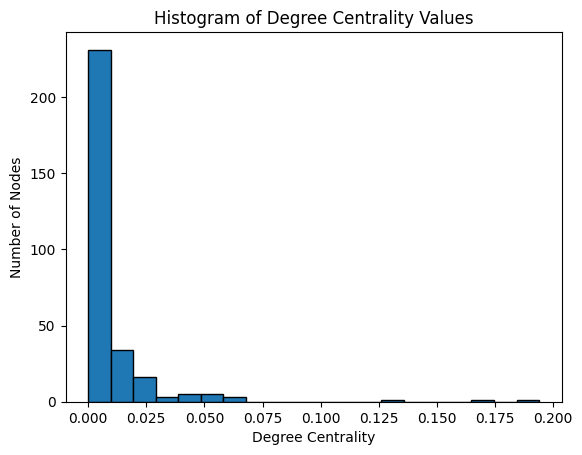

Mean Degree Centrality: 0.008539576365663321


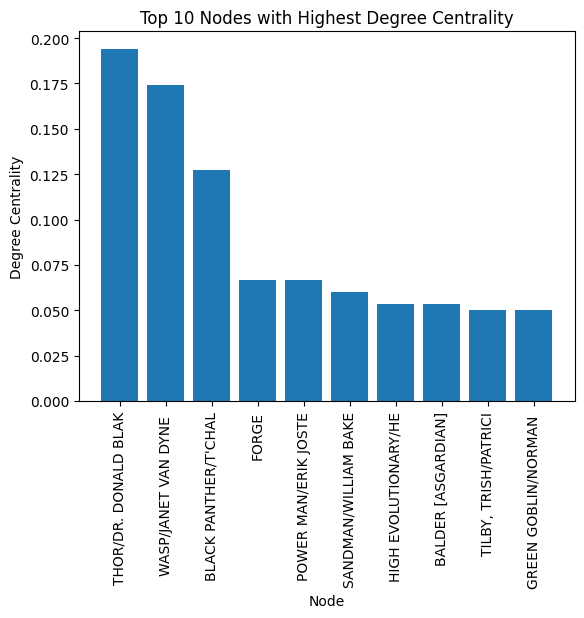

In [17]:
# Plot histogram of degree centrality values
plt.hist(list(degree_centrality.values()), bins=20, edgecolor='black')
plt.xlabel('Degree Centrality')
plt.ylabel('Number of Nodes')
plt.title('Histogram of Degree Centrality Values')
plt.show()

# Calculate mean degree centrality
mean_degree_centrality = np.mean(list(degree_centrality.values()))
print("Mean Degree Centrality:", mean_degree_centrality)

# Plot bar graph of top 10 nodes with highest degree centrality
top_10 = dict(list(sorted_degree_centrality.items())[:10])
plt.bar(top_10.keys(), top_10.values())
plt.xlabel('Node')
plt.ylabel('Degree Centrality')
plt.title('Top 10 Nodes with Highest Degree Centrality')
plt.xticks(rotation=90)
plt.show()

In [30]:
# Calculate degree centralities for each node in the subgraph
degree_centralities = nx.degree_centrality(subgraph)
degree_values = list(degree_centralities.values())

# Calculate mean and standard deviation
mean = np.mean(degree_values)
std = np.std(degree_values)

print("The mean of degree centrality is:", mean)
print("The standard deviation of degree centrality is:", std)


The mean of degree centrality is: 0.008561872909698997
The standard deviation of degree centrality is: 0.01679573666094852


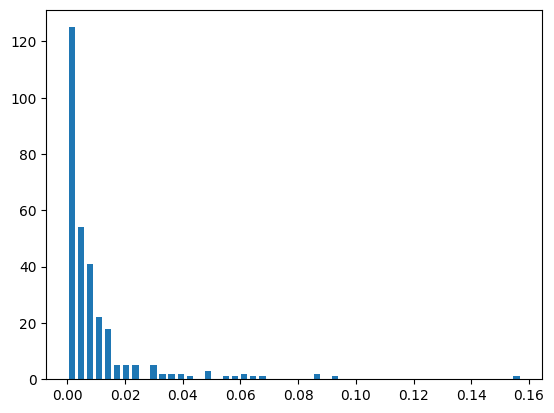

In [31]:
import matplotlib.pyplot as plt

# Calculate the distribution of degree centralities
hist, bins = np.histogram(degree_values, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

# Plot the distribution
plt.bar(center, hist, align='center', width=width)
plt.show()


In [33]:
import pandas as pd

# Calculate other centrality measures, such as closeness centrality and betweenness centrality
closeness_centralities = nx.closeness_centrality(subgraph)
closeness_values = list(closeness_centralities.values())
betweenness_centralities = nx.betweenness_centrality(subgraph)
betweenness_values = list(betweenness_centralities.values())

# Create a dataframe to store the centralities
df = pd.DataFrame({'degree': degree_values, 'closeness': closeness_values, 'betweenness': betweenness_values})

# Calculate the correlation between the centralities
correlation = df.corr()

print("The correlation between the centralities is:")
print(correlation)


The correlation between the centralities is:
               degree  closeness  betweenness
degree       1.000000   0.610616     0.854535
closeness    0.610616   1.000000     0.385262
betweenness  0.854535   0.385262     1.000000


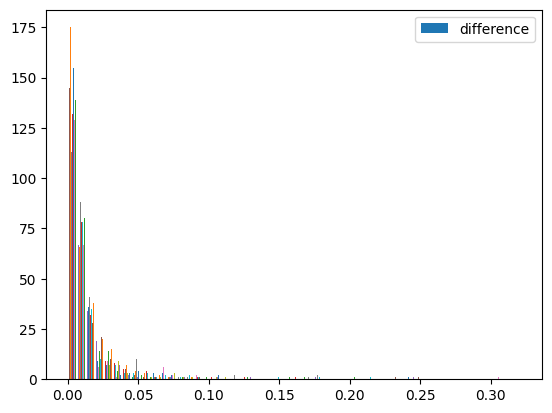

In [34]:
import random

# Store the degree centralities of each subgraph
all_degree_centralities = []

# Create and analyze 10 random subgraphs with 300 nodes each
for i in range(10):
    nodes = random.sample(list(G.nodes()), 300)
    subgraph = G.subgraph(nodes)
    degree_centralities = nx.degree_centrality(subgraph)
    degree_values = list(degree_centralities.values())
    all_degree_centralities.append(degree_values)

# Compare the values of degree centralities between the subgraphs
differences = []
for i in range(10):
    for j in range(i+1, 10):
        difference = np.abs(np.array(all_degree_centralities[i]) - np.array(all_degree_centralities[j]))
        differences.append(difference)

# Plot the differences
plt.hist(differences, bins=50, label=['difference'])
plt.legend()
plt.show()
